In [1]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/cheribeda/datamining/main/auto-mpg.csv'

# Load the data into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to ensure it was imported correctly
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [2]:
# Remove the 'car name' column
df.drop(columns=['car name'], inplace=True)

# Convert 'horsepower' column to numeric and replace non-numeric values with mean
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')  # Convert to numeric, coerce errors to NaN
horsepower_mean = df['horsepower'].mean()  # Calculate the mean
df['horsepower'].fillna(horsepower_mean, inplace=True)  # Replace NaN values with mean

# Step 3: Create dummy variables for the 'origin' column
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

# Display the first few rows of the prepped DataFrame
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin_1  origin_2  origin_3  
0          70         1         0         0  
1          70         1         0         0  
2          70         1         0         0  
3          70         1         0         0  
4          70         1         0         0  


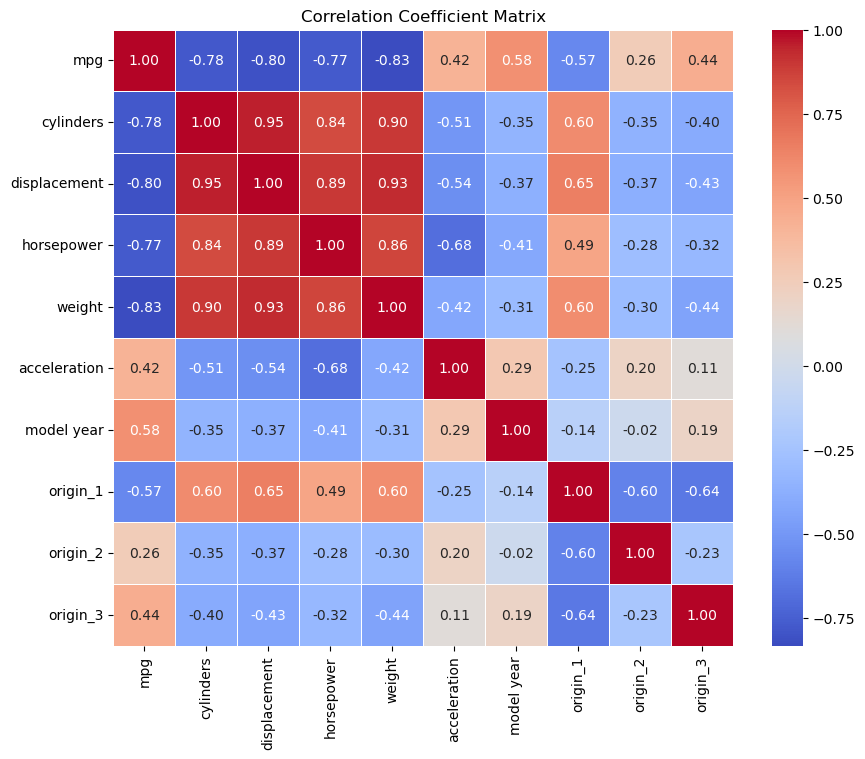

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Coefficient Matrix')
plt.show()


 

Negative Correlation with mpg:

Cylinders: The number of cylinders in an engine has a correlation coefficient of -0.78 with mpg, indicating a strong negative correlation. As the number of cylinders increases, mpg tends to decrease.
Displacement: This measures the size of the engine in cubic centimeters or cubic inches. Displacement has a correlation coefficient of -0.80 with mpg, also indicating a strong negative correlation.
Horsepower: The power output of the engine shows a correlation coefficient of -0.77 with mpg, suggesting that vehicles with more horsepower tend to have lower mpg.
Weight: The weight of the vehicle has a correlation coefficient of -0.83 with mpg, which is one of the strongest negative correlations in this matrix. Heavier vehicles typically consume more fuel.

Positive Correlation with mpg:

Acceleration: This feature has a correlation coefficient of 0.42 with mpg. This positive correlation suggests that vehicles with better acceleration efficiency tend to have higher mpg, though the correlation is not as strong as the negative ones.
Model Year: The model year of the vehicle has a correlation coefficient of 0.58 with mpg, indicating that newer models tend to be more fuel-efficient.
The colors on the heatmap reflect these correlations, with red shades indicating positive correlation and blue shades indicating negative correlation. The closer the absolute value of the coefficient is to 1, the stronger the correlation. Negative values close to -1 indicate strong negative correlations, meaning as one variable increases, the other decreases. Values close to 1 indicate strong positive correlations, where the variables increase together.







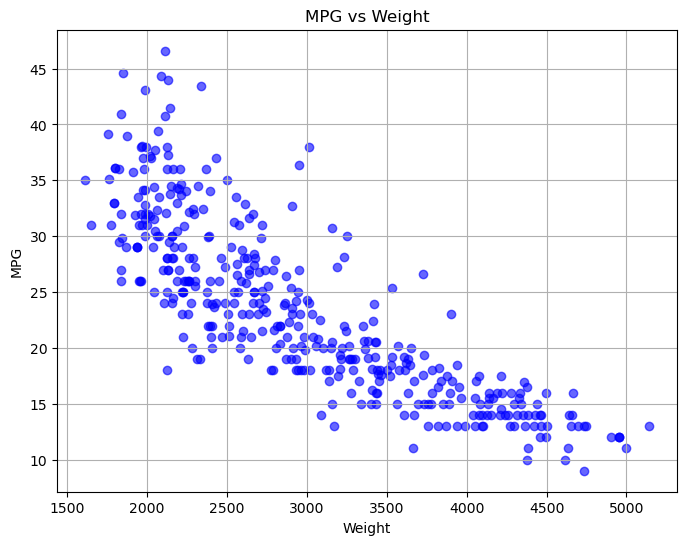

In [4]:
# Plot mpg versus weight
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['mpg'], alpha=0.6, color='blue')
plt.title('MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()


The plot exhibits a negative trend; as the weight on the x-axis increases, the MPG on the y-axis tends to decrease. This pattern indicates a negative correlation between vehicle weight and fuel efficiency, with heavier vehicles generally having lower MPG.

This graph is consistent with the correlation coefficient for MPG and weight indicated from the heatmap, which was approximately -0.83. A correlation coefficient of -0.83 suggests a strong negative linear relationship, meaning that as one variable increases, the other variable tends to decrease.

In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['mpg'])
y = df['mpg']

# Split the data into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)


Training data shape: (318, 9) (318,)
Test data shape: (80, 9) (80,)


In [6]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)


Coefficients: [-0.16373048  0.01958399 -0.01334457 -0.00707275  0.07335016  0.82739747
 -1.86404853  1.07519552  0.78885302]
Intercept: -20.202660225230595


In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on training and test data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculate R2 score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training Set:")
print("R2 Score:", r2_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("\nTest Set:")
print("R2 Score:", r2_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)


Training Set:
R2 Score: 0.8188288951042786
RMSE: 3.370273563938906
MAE: 2.6054846937710354

Test Set:
R2 Score: 0.8449006123776617
RMSE: 2.8877573478836305
MAE: 2.287586770442106


Training Set:

R2 Score: 0.8188
RMSE: 3.3703
MAE: 2.6055
Test Set:

Test Set:

R2 Score: 0.8449
RMSE: 2.8878
MAE: 2.2876

Interpretation:
R2 Score: The linear regression model explains approximately 81.88% of the variance in the training set and 84.49% of the variance in the test set. These values indicate that the model fits the data well.

RMSE: The root mean squared error measures the average deviation of the predicted values from the actual values. The RMSE for the training set is 3.3703 and for the test set is 2.8878. These values suggest that, on average, the predictions are off by approximately 3.37 and 2.89 units of mpg for the training and test sets.

MAE: The mean absolute error measures the average absolute difference between the predicted and actual values. The MAE for the training set is 2.6055 and for the test set is 2.2876. These values indicate that, on average, the predictions are off by approximately 2.61 and 2.29 units of mpg for the training and test sets.

Overall, the model performs well on both the training and test sets, with slightly better performance observed on the test set. This suggests that the model generalizes well to unseen data. 

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regression model
rf_regressor = RandomForestRegressor(random_state=42)


In [11]:
# Fit the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# Predict on training and test data
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Calculate R2 score
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Calculate RMSE
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Calculate MAE
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print the results
print("Random Forest Regression Results:")
print("Training Set:")
print("R2 Score:", r2_train_rf)
print("RMSE:", rmse_train_rf)
print("MAE:", mae_train_rf)
print("\nTest Set:")
print("R2 Score:", r2_test_rf)
print("RMSE:", rmse_test_rf)
print("MAE:", mae_test_rf)


Random Forest Regression Results:
Training Set:
R2 Score: 0.9808232079849052
RMSE: 1.096500076716365
MAE: 0.7471289308176098

Test Set:
R2 Score: 0.9145272184753711
RMSE: 2.1437274780158044
MAE: 1.5959750000000006


This code does the following:

Initializes a Random Forest Regression model.
Fits the model on the training data.
Predicts on both the training and test sets.
Calculates the  R2 score, RMSE, and MAE for both training and test sets.
Prints out the results.

Interpretation:


R2 Score: The Random Forest Regression model explains approximately 98.08% of the variance in the training set and 91.45% of the variance in the test set. These values indicate that the model fits the data very well.

RMSE: The root mean squared error measures the average deviation of the predicted values from the actual values. The RMSE for the training set is 1.0965 and for the test set is 2.1437. These values suggest that, on average, the predictions are off by approximately 1.10 and 2.14 units of mpg for the training and test sets.

MAE: The mean absolute error measures the average absolute difference between the predicted and actual values. The MAE for the training set is 0.7471 and for the test set is 1.5960. These values indicate that, on average, the predictions are off by approximately 0.75 and 1.60 units of mpg for the training and test sets.

Overall, the Random Forest Regression model performs well on both the training and test sets, with high R2 scores and relatively low RMSE and MAE values. This suggests that the model generalizes well to unseen data and accurately predicts the mpg values.
